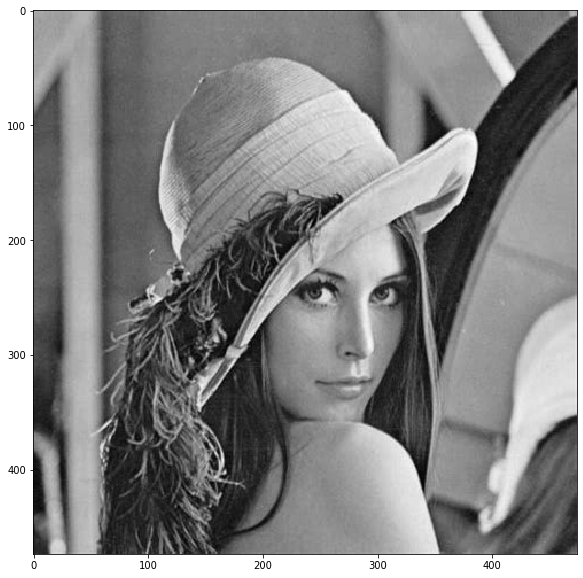

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def otsu(histograma):
    #suma = 0
    #for i in histograma:
     #   suma += i
        
    #print(suma)
    
    array = histograma
    varianzas = []

    for i, value in enumerate(array):
        q1, q2, u1, u2, z1, z2 = 0, 0, 0, 0, 0, 0

        for y, val in enumerate(array):
            if y <= i:
                q1 += val
            else:
                q2 += val

        #if q1 == 0:
         #   q1 = 1
        #if q2 == 0:
         #   q2 = 1
        
        q1 = 1 if q1 == 0 else q1
        q2 = 1 if q2 == 0 else q2
        
        for y, val in enumerate(array):
            if y <= i:
                u1 += (val * y) / q1
            else:
                u2 += (val * y) / q2

        for y, val in enumerate(array):
            if y <= i:
                z1 += ((y - u1)**2) * (val / q1)
            else:
                z2 += ((y - u2)**2) * (val / q2)

        varianzas.append(q1*z1 + q2*z2)

    return varianzas.index(min(varianzas))

plt.figure(figsize=(10,10))

lena = cv2.imread('lena.jpg')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

plt.imshow(lena, 'gray')


In [58]:
lena_hist, basura_marina = np.histogram(lena.ravel(), 256, [0, 256])
_, bw = cv2.threshold(lena, 120, 255, cv2.THRESH_OTSU)
tresh = otsu(lena_hist)

#print(lena_hist)
#print(lena.shape)
print(tresh)
print(_)

(474, 474)
116
116.0


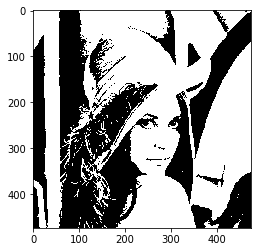

In [53]:
_, bw = cv2.threshold(lena, tresh, 255, cv2.THRESH_BINARY )
plt.imshow(bw,'gray')

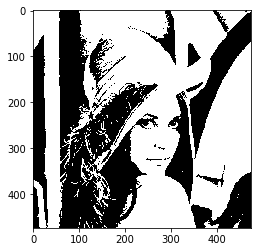

In [52]:
_, bw = cv2.threshold(lena, 120, 255, cv2.THRESH_OTSU)
plt.imshow(bw,'gray')